# Fertility Rates Wordwide: Analysis and Predictive model

This work is made of two notebooks:
- Notebook 1: data collection, data exploration and analysis
- Notebook 2: Machine Learning Model for predicting fertility rates

# Notebook 1/2: data collection, data exploration and analysis

## Objective

On average, fertility rates wordwide have dramatically decreased over the last 60 years.

Still, there are significant differences in fertility rates among countries, with Central African countries showing the highest rates and G10 countries showing rates between 1.0 and 1.5.

The Objectives of this work are:
1. analyze the correlation between fertility rates and other economic and social variables, and
2. define a machine learnig model to predict the future fertility rates.

Data Source: Quandl (World Bank Organization Database)

### Import Python libraries

In [93]:
import quandl
import pandas as pd
import numpy as np
import plotly.express as px
pd.options.display.max_rows = 999

### Quandl API KEY

In [94]:
quandl.ApiConfig.api_key = "*******************"

### Build the functions for data analysis

In [95]:
### the following function retrieves data from quandl based on the table code.
def get_data(table_code, metadata = False, series = None, country_id = None, pagination = True):
    if metadata:
        meta = 'METADATA' 
    else:
        meta = 'DATA'
    tables = quandl.get_table("{}/{}".format(table_code, meta), series_id = series, country_code = country_id, paginate = pagination)
    return tables

In [96]:
### the following function returns a list of metadata names filtered by a specific keyword.
def get_serials(available_tables, keyword):
    splitted_names = [i.split() for i in available_tables['name']]
    filtered = []
    for n, name in enumerate(splitted_names):
        if keyword in name:
            ser_id = available_tables.iloc[n]['series_id']
            filtered.append(ser_id)
    return filtered

In [97]:
### the following function is used to filter the metadata table by a specific keyword.
def filter_data_by_keyword(data, keyword):
    filtered_data = get_serials(data, keyword)
    return data.loc[data['series_id'].isin(filtered_data)][['series_id', 'name']]

In [98]:
### The following function returns the dataframe for the selected quandl table and plots the main insights of the df.
def report(table, data):
    metadata = get_data(table, metadata = True, series = data)
    figtitle = metadata['name'][0]
    table = get_data(table, series =data)
    df = pd.DataFrame(table).reset_index()[['country_name', 'country_code', 'year', 'value']].sort_values(by = 'year', ascending = True)
    fig = px.line(df, x = 'year', y = 'value', color = 'country_code', title = figtitle)
    fig.show("png")
    fig1 = px.bar(df.loc[df['year']== df['year'].max()].sort_values(by = 'value', ascending = False)[:30] , x = 'country_name', y = 'value', title = figtitle)
    fig1.show("png")
    fig2 = px.choropleth(df.loc[df['year']== df['year'].max()],locations = 'country_code', color= 'value')
    fig2.show("png")
    return df

In [99]:
### the following function merges two dataframes adding incremental variables.
def add_variable(main_db, new_feature_db, x_val, y_val):
    try:
        main_db = main_db.rename(columns = {'value': y_val})
    except:
        pass
    
    try:
        new_feature_db = new_feature_db.rename(columns = {'value': x_val})
    except:
        pass
    
    newdf = pd.merge(main_db, new_feature_db, on = ['country_name', 'country_code', 'year'], how = 'inner')

    correlation_plot = px.scatter(newdf.loc[newdf['year'] == newdf['year'].max()],x = x_val, y = y_val , color = 'country_name' )
    correlation_plot.show("png")
    return newdf

### Search Quandl tables based on keywords

The script below has been used during the analysis to get the quandl table_id's based on the factors (keywords) that we want to analyze:

In [100]:
KEYWORD_TO_BE_ANALYZED = 'fertility'

In [101]:
filter_data_by_keyword(get_data("WB", metadata = True), KEYWORD_TO_BE_ANALYZED)

,series_id,name
None,,
177,SP.DYN.WFRT,Wanted fertility rate (births per woman)
193,SP.ADO.TFRT,"Adolescent fertility rate (births per 1,000 wo..."


### Analysis of fertility rates wordwide

Fertility rate represents the dependent variable of the analysis.

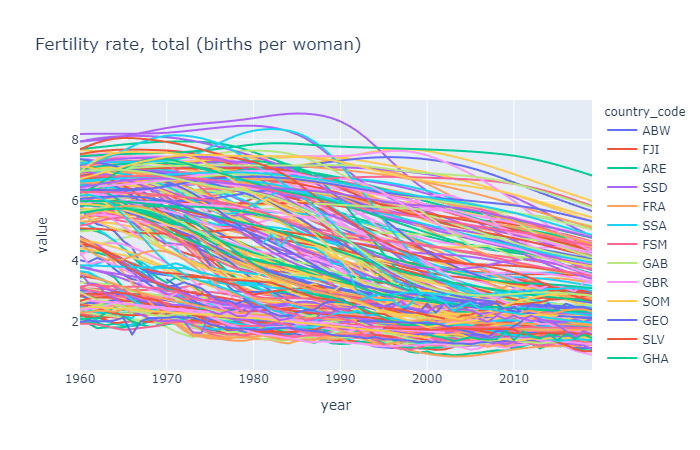

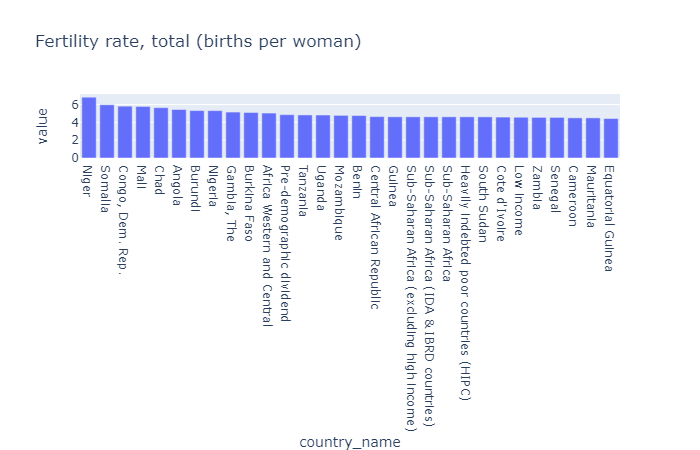

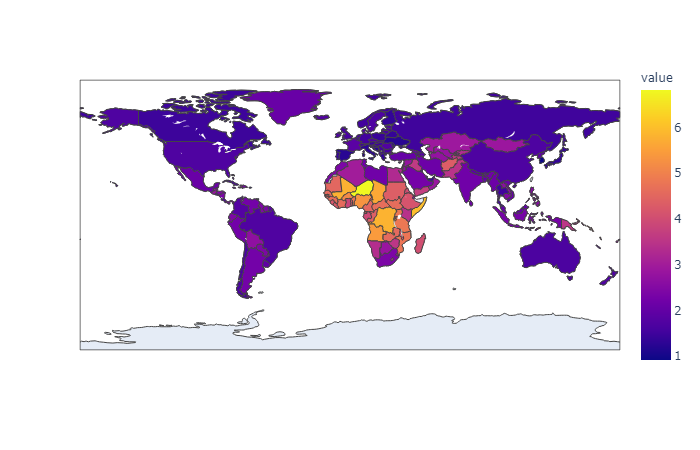

In [102]:
fertility_rates = report('WB','SP.DYN.TFRT.IN')

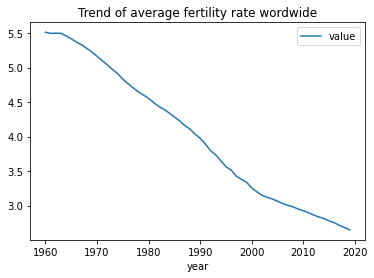

In [103]:
fertility_rates.groupby(by = 'year').mean().plot(title = 'Trend of average fertility rate wordwide')

## Analysis of independent variables

For this analysis we will analyze how the fertility rate is affected by the following variables:
- Gross Domestic Product (GDP) per Capita
- Life Expectancy at birth
- Employment Rate
- Women in Business and Law index (this index is a score of the country's opportunities for women to access business and law)
- Morality rates (infants)
- School Enrollment rates, and indicator for the level of education


### Analysis of Gross Domestic Product (GDP) per Capita

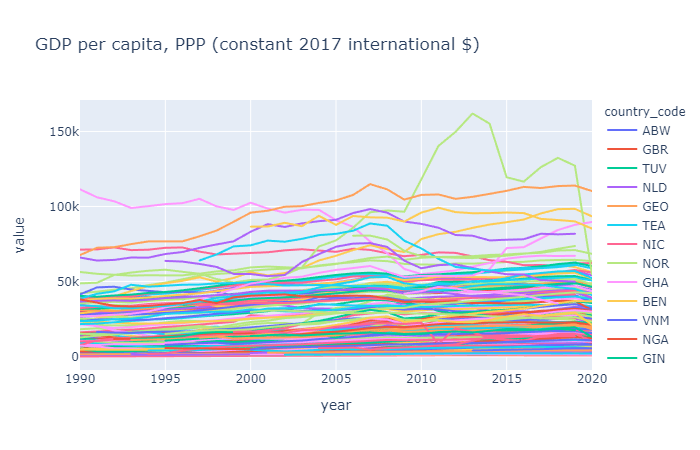

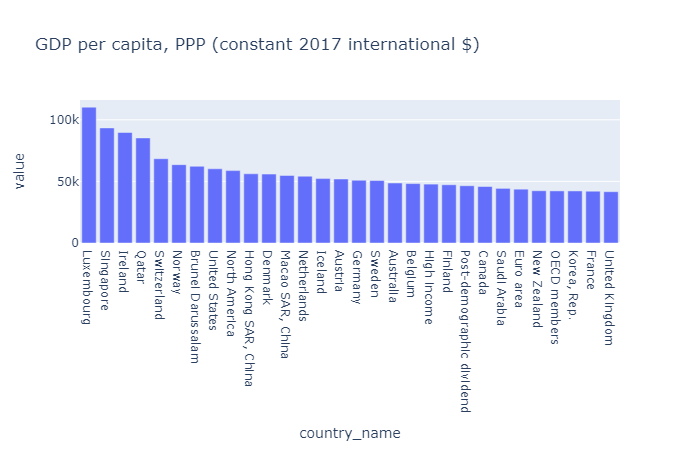

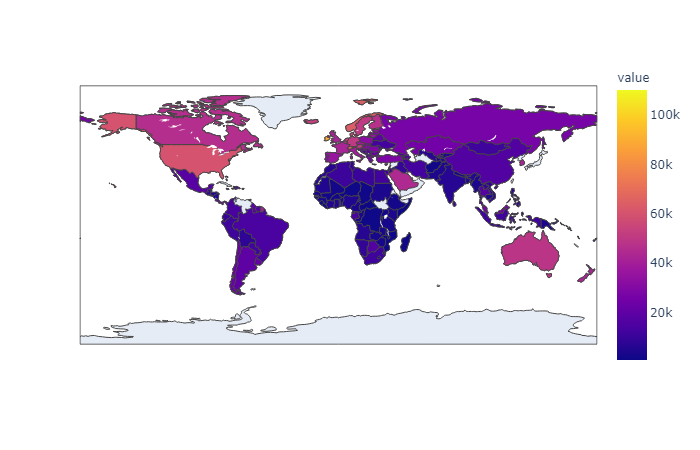

In [104]:
gdp = report('WB','NY.GDP.PCAP.PP.KD')

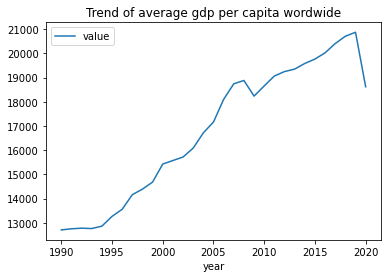

In [105]:
gdp.groupby(by = 'year').mean().plot(title = 'Trend of average gdp per capita wordwide')

### Analysis of Life Expectancy at birth

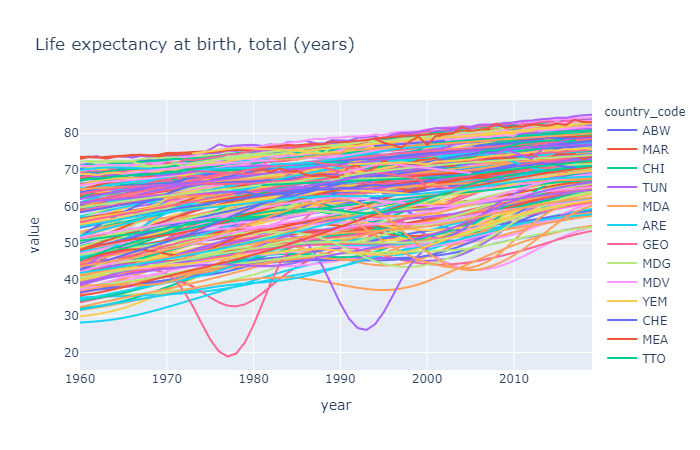

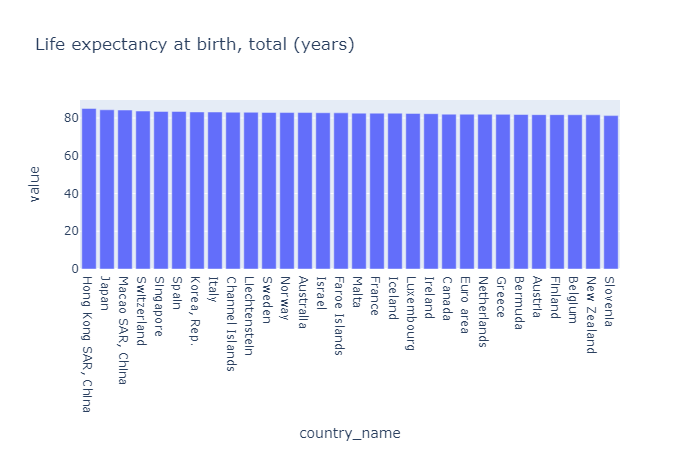

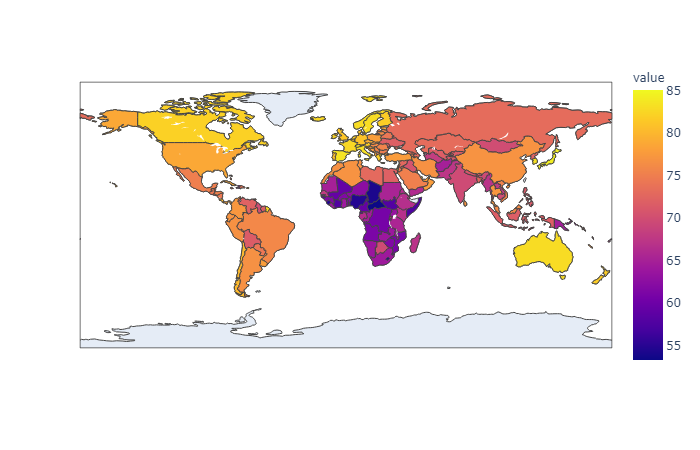

In [106]:
le = report('WB','SP.DYN.LE00.IN')

### Analysis of Employment Rate

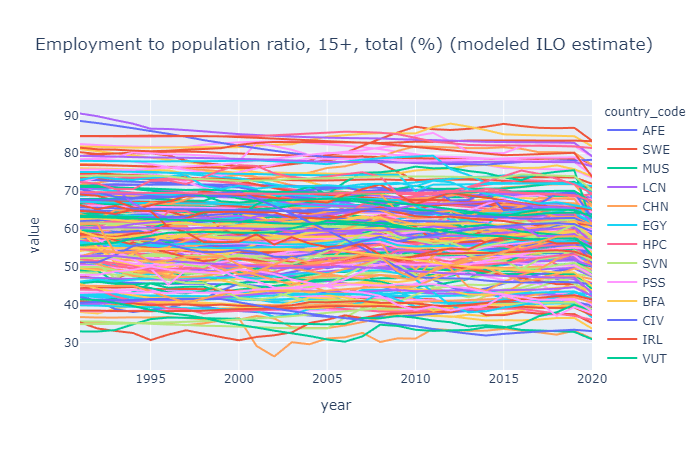

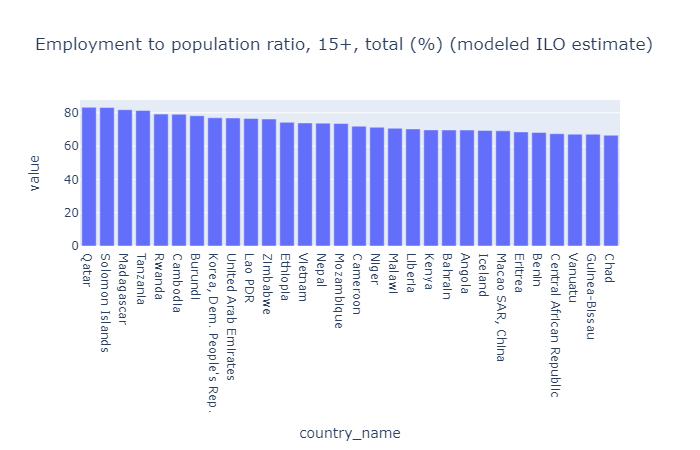

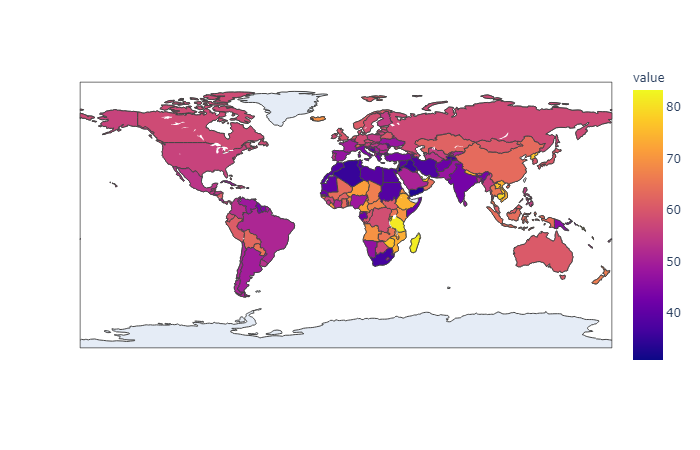

In [107]:
empl_rate = report('WB','SL.EMP.TOTL.SP.ZS')

### Analysis of Women in Business and Law index

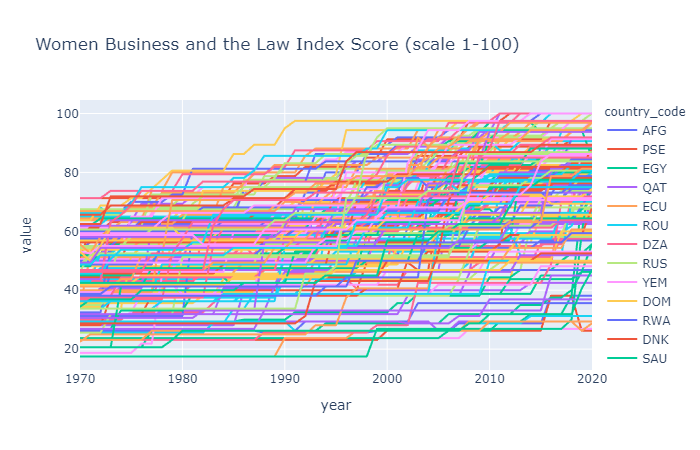

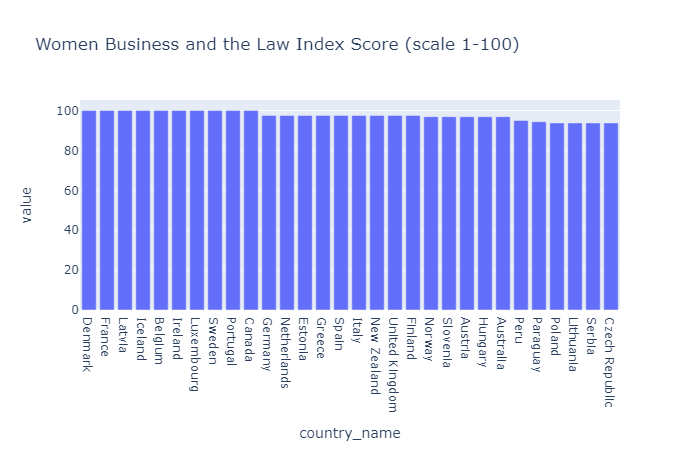

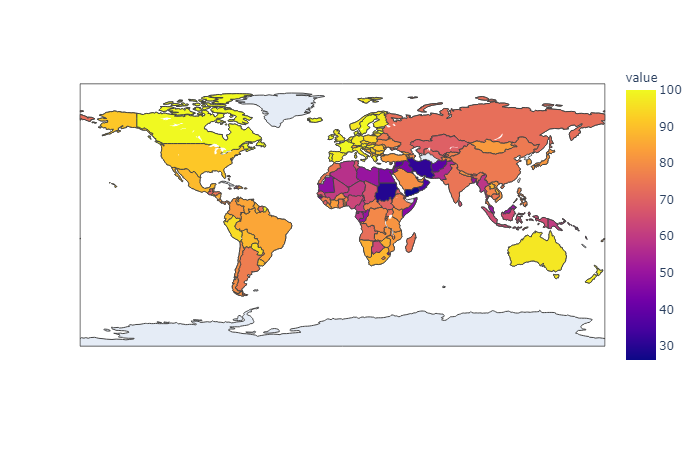

In [108]:
wbi = report('WB','SG.LAW.INDX')

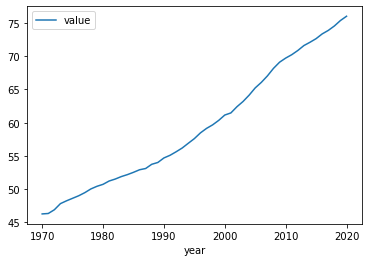

In [109]:
wbi.groupby(by = 'year').mean().plot()

### Analysis of morality rates (infants)

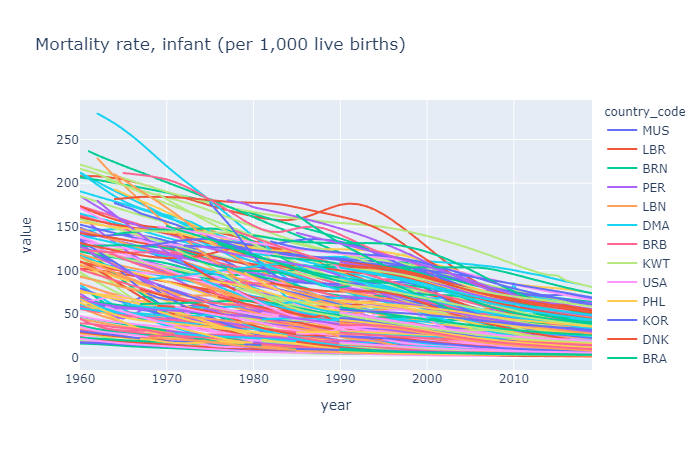

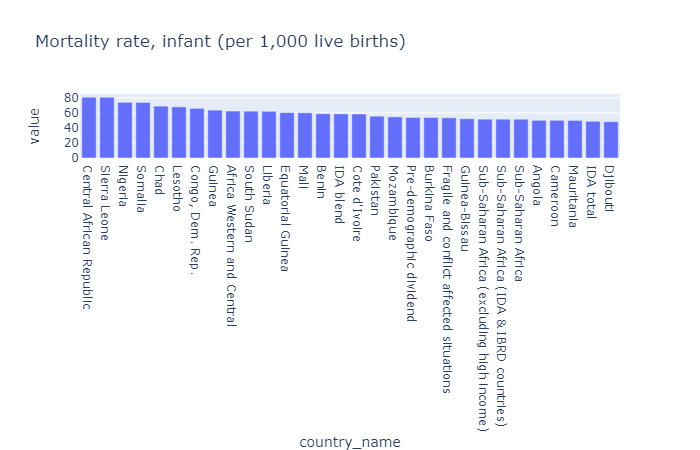

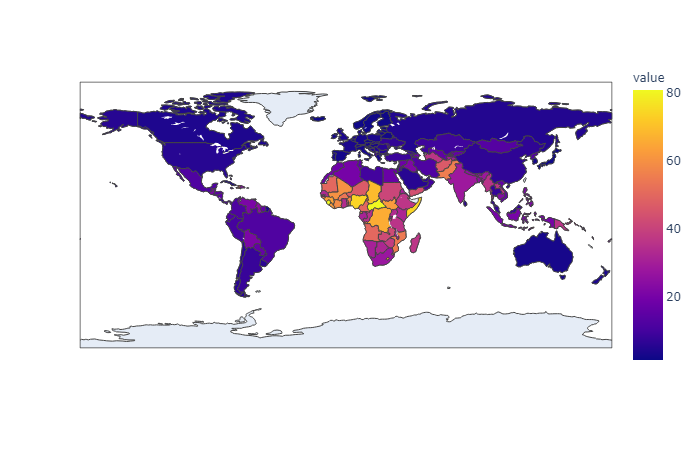

In [110]:
mr = report("WB", "SP.DYN.IMRT.IN")

### Analysis of School Enrollment Rates

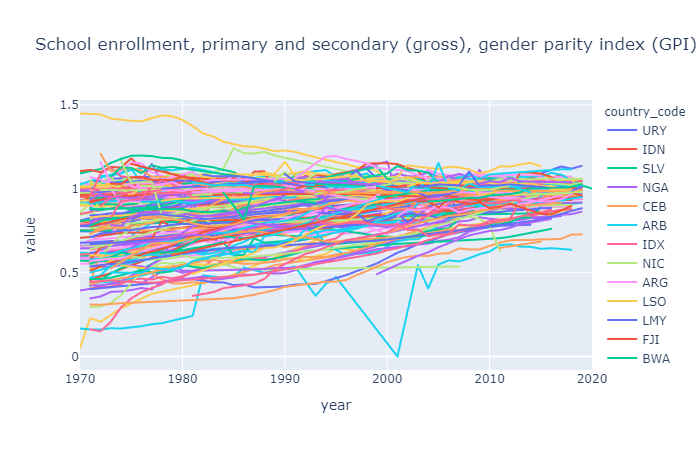

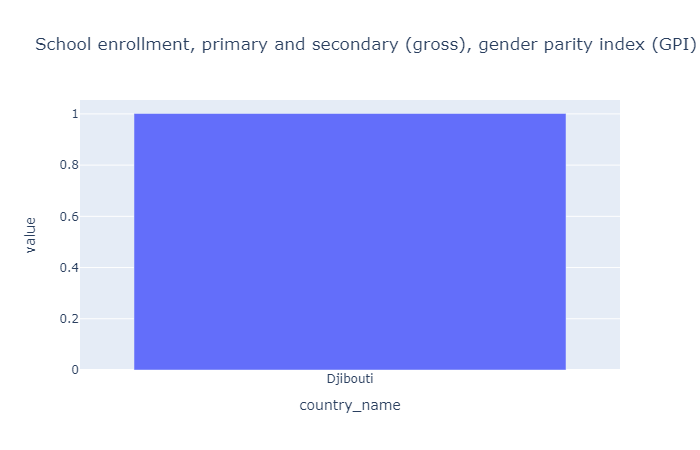

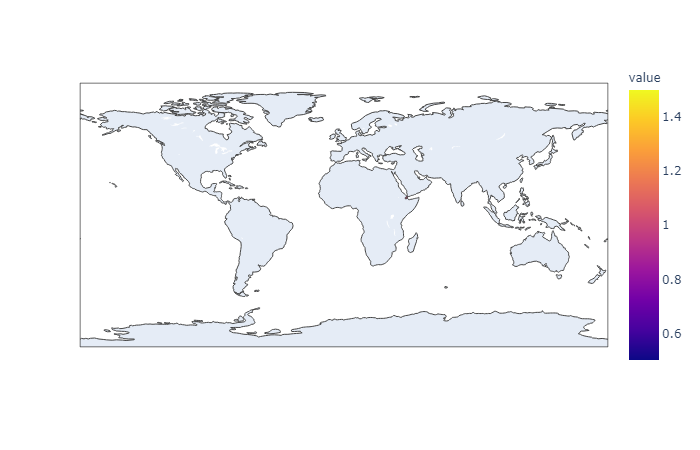

In [111]:
sch = report("WB", "SE.ENR.PRSC.FM.ZS")

## Analysis of Correlation between fertility rates and the selected undependent variables

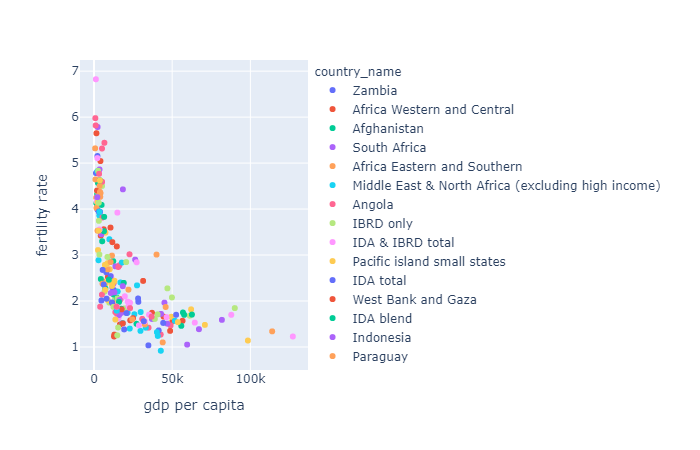

In [112]:
df = add_variable(fertility_rates, gdp, x_val = 'gdp per capita', y_val = 'fertility rate')

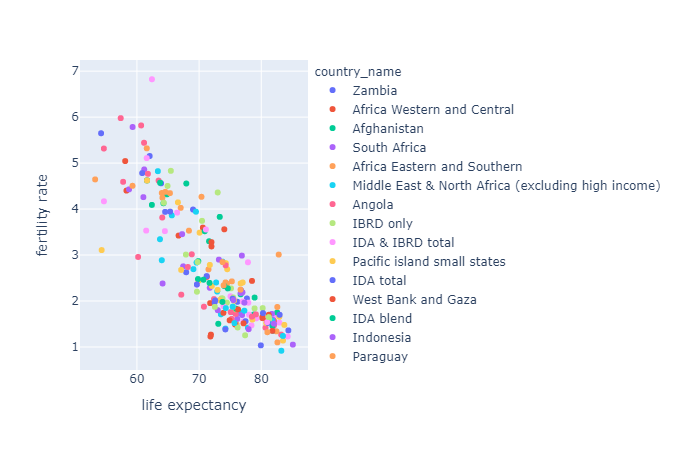

In [113]:
df = add_variable(df, le, x_val = 'life expectancy', y_val = 'fertility rate')

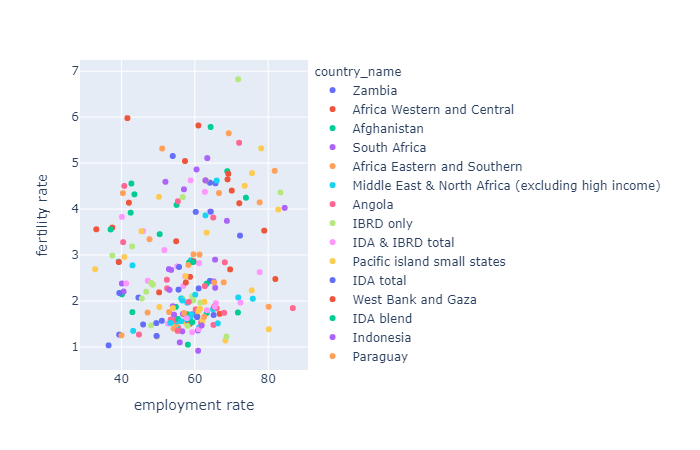

In [114]:
df = add_variable(df, empl_rate, x_val = 'employment rate', y_val = 'fertility rate')

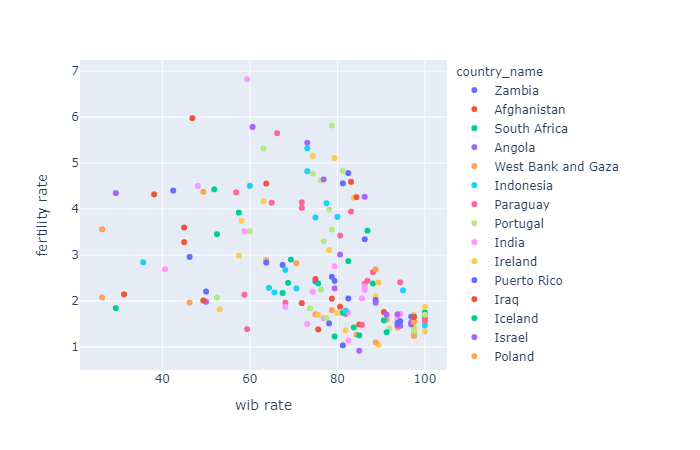

In [115]:
df = add_variable(df, wbi, x_val = 'wib rate', y_val = 'fertility rate')

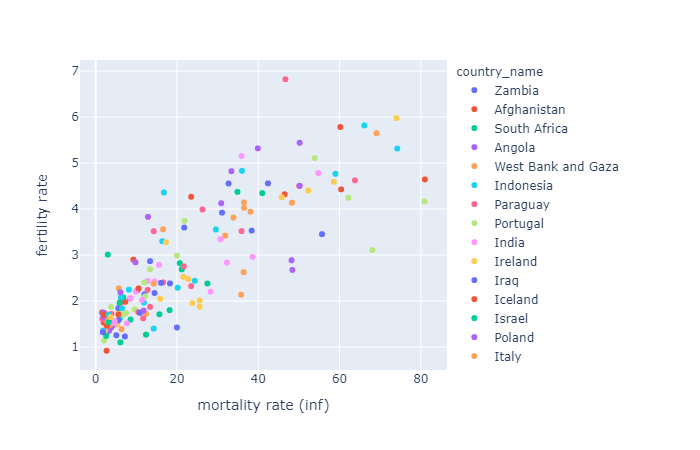

In [116]:
df = add_variable(df, mr, x_val = 'mortality rate (inf)', y_val = 'fertility rate')

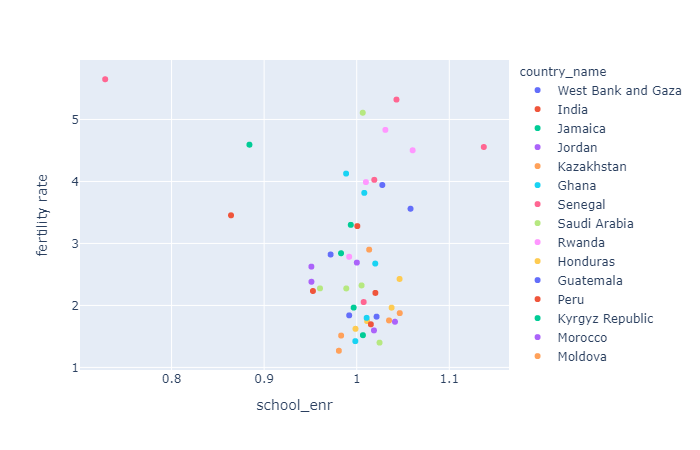

In [117]:
df = add_variable(df, sch, x_val = 'school_enr', y_val = 'fertility rate')

## Summary of correlations

In [118]:
df.corr()

,year,fertility rate,gdp per capita,life expectancy,employment rate,wib rate,mortality rate (inf),school_enr
year,1.000000,-0.157891,0.096832,0.234954,0.007635,0.343136,-0.230337,0.177032
fertility rate,-0.157891,1.000000,-0.528619,-0.812574,0.309839,-0.546433,0.854320,-0.662042
gdp per capita,0.096832,-0.528619,1.000000,0.646661,-0.013291,0.359984,-0.604153,0.323950
life expectancy,0.234954,-0.812574,0.646661,1.000000,-0.255388,0.510300,-0.917483,0.589886
employment rate,0.007635,0.309839,-0.013291,-0.255388,1.000000,0.041188,0.313677,-0.246434
wib rate,0.343136,-0.546433,0.359984,0.510300,0.041188,1.000000,-0.494199,0.339146
mortality rate (inf),-0.230337,0.854320,-0.604153,-0.917483,0.313677,-0.494199,1.000000,-0.710860
school_enr,0.177032,-0.662042,0.323950,0.589886,-0.246434,0.339146,-0.710860,1.000000


## Export data to csv

In [119]:
df.to_csv(r"C:\Users\f93495c\Downloads\franalysis.csv", sep = ";")